In [22]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
df = pd.read_csv("tweet_data.csv")
df = df.sample(frac=1).reset_index(drop=True)

df['Text'] = df['Text'].apply(lambda x: x.lower())  # transform text to lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
print(df.shape)
df.head(10)

(5791, 2)


,Text,Sentiment
0,aap i cant remember another time i was so happ...,1
1,ddd strong winner buy right and sit tight darv...,1
2,ana with the conference tomorrow i guess we wi...,1
3,msft gap close continues base si rising nice ...,1
4,cf cliff the head shoulder still thinks its ...,-1
5,amzn but but butyap yap yap,1
6,pay ncertainty is never a good thing,-1
7,adding to short on wynn,-1
8,tip p fill the gap,1
9,cee hit fib level 5180,-1


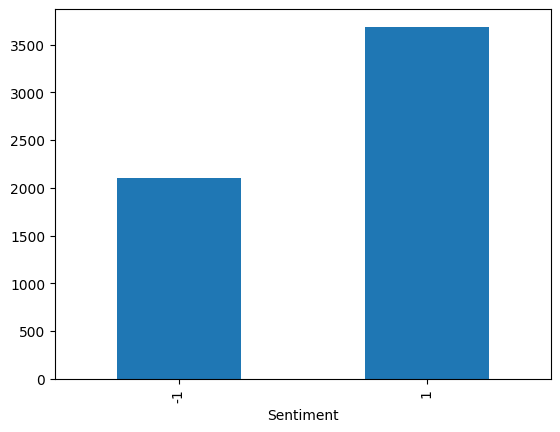

In [28]:
df['Sentiment'].value_counts().sort_index().plot.bar()
plt.savefig("single_count.png")

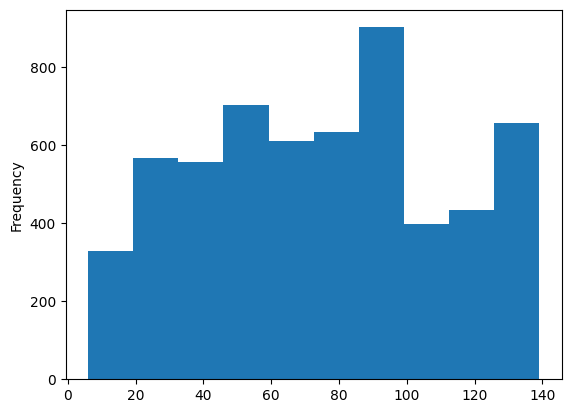

In [29]:
df['Text'].str.len().plot.hist()
plt.savefig("tweet_len.png")

In [30]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)
print("X tokenized data = ", X[:5])

X tokenized data =  [[   0    0    0    0    0    0    0    0    0    0    0    8   15  521
  1231  164   76   15   81   67 1015    4    3  128   58   13   37  141
    67 2065   22]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   136  130 1016   56  180    9 3238  496 3239  139  452  217 2066  497
   111   49  241]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0  651   20    1 1123  156   15 1017   61   18  218
  4776   59   77]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  361  117   82  319  338  330  548   54 3240  201   49  118  352
    89 4777  598]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0  353 2067    1  549 1124   52
  1553   40  180]]


In [31]:
y = pd.get_dummies(df['Sentiment']).values
[print(df['Sentiment'][i], y[i]) for i in range(0, 5)]

1 [False  True]
1 [False  True]
1 [False  True]
1 [False  True]
-1 [ True False]


[None, None, None, None, None]

In [32]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(GRU(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(GRU(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
batch_size = 32
epochs = 8

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
145/145 - 36s - 250ms/step - accuracy: 0.6926 - loss: 0.5957
Epoch 2/8
145/145 - 40s - 278ms/step - accuracy: 0.8260 - loss: 0.4055
Epoch 3/8
145/145 - 40s - 279ms/step - accuracy: 0.8923 - loss: 0.2575
Epoch 4/8
145/145 - 30s - 209ms/step - accuracy: 0.9244 - loss: 0.1933
Epoch 5/8
145/145 - 41s - 285ms/step - accuracy: 0.9506 - loss: 0.1329
Epoch 6/8
145/145 - 41s - 286ms/step - accuracy: 0.9663 - loss: 0.0899
Epoch 7/8
145/145 - 41s - 284ms/step - accuracy: 0.9728 - loss: 0.0770
Epoch 8/8
145/145 - 41s - 279ms/step - accuracy: 0.9691 - loss: 0.1225


In [36]:
predictions = model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


In [37]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    if np.argmax(y_test[i])==1:
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)

print('Real neutral:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 802
Negative predictions: 357
Real neutral: 740
Real negative: 419


In [16]:
import matplotlib.pyplot as plt

In [17]:
print(history.history['loss'], )
predictions = [pos_count, neg_count]
real = [real_pos, real_neg]
labels = ['Positive', 'Negative']

[0.581076443195343, 0.3801443874835968, 0.2535172700881958, 0.18997791409492493, 0.16978904604911804, 0.12953965365886688, 0.07787027955055237, 0.052265241742134094]


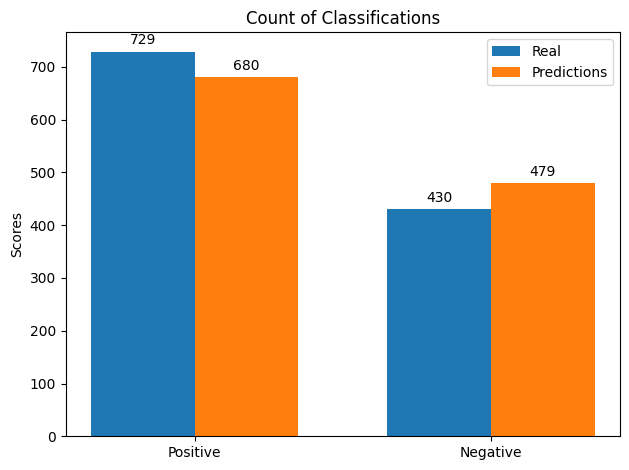

In [19]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real, width, label='Real')
rects2 = ax.bar(x + width/2, predictions, width, label='Predictions')

ax.set_ylabel('Scores')
ax.set_title('Count of Classifications')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("predictions_gru.png")
plt.show()

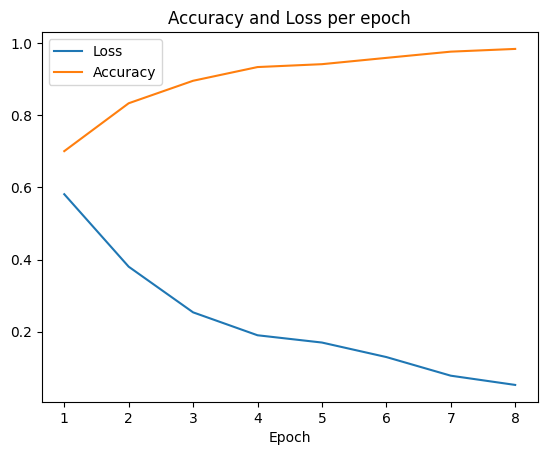

In [20]:
fig, ax = plt.subplots()
loss = history.history['loss']
epoch = [item for item in range(1,9)]
accuracy = history.history['accuracy']
ax.plot(epoch, loss, label = "Loss")
ax.plot(epoch, accuracy, label = "Accuracy")

ax.set_xlabel('Epoch')
ax.set_title('Accuracy and Loss per epoch')
plt.legend()
plt.savefig("epoch_gru.png")
plt.show()

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

ValueError: You must call `compile()` before using the model.